In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import os

### Config

In [2]:
folder_path = 'measurements/'
columns_to_keep = ['QPS', 'p95', 'target']
dfs = {}
grouped_dfs = {interference_type: [] for interference_type in ['cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw', 'none']}

### Load Data

In [3]:
for file in os.listdir(folder_path):
    if file.endswith('.raw'):
        file_path = os.path.join(folder_path, file)
        parts = file.split('-')
        interference_type = parts[1]
        run_number = parts[2].split('.')[0]
        data = pd.read_csv(file_path, sep=r'\s+', usecols=columns_to_keep, skipfooter=2, engine='python')
        dfs[f'{interference_type}_{run_number}'] = data

### Plot 1

#### Luca's version (ASL guidelines)

In [4]:
# //TODO

#### Chris' version (CCA guidelines)

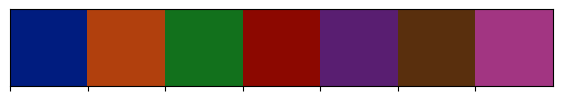

In [4]:
# try: deep, muted, bright, , tab10, pastel, dark, colorblind, husl, hls
sns.palplot(sns.color_palette("dark", 7))

In [15]:
# Plot Style
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
# Seaborn colors
colors = sns.color_palette("tab10", 7)
ax.set_prop_cycle('color', colors)

for key in sorted(dfs.keys()):
    parts = key.split('_')
    interference_type = '_'.join(parts[:-1])
    run_number = parts[-1]
    
    if interference_type in grouped_dfs:
        grouped_dfs[interference_type].append(dfs[key])

for i, (interference_type, df_list) in enumerate(grouped_dfs.items()):
    p95_means = list()
    p95_stds = list()
    qps_means = list()
    qps_stds = list()
    
    target_qps_levels = df_list[0]['target'].values if df_list else []
    
    for target_qps in target_qps_levels:
        p95_values = [df[df['target'] == target_qps]['p95'].values[0] / 1000.0 for df in df_list]
        qps_values = [df[df['target'] == target_qps]['QPS'].values[0] / 1000.0 for df in df_list]
        
        p95_means.append(np.mean(p95_values))
        p95_stds.append(np.std(p95_values, ddof=1))
        qps_means.append(np.mean(qps_values))
        qps_stds.append(np.std(qps_values, ddof=1))
    
    ax.errorbar(qps_means, p95_means, xerr=qps_stds, yerr=p95_stds, fmt=".-", linewidth=0.75, alpha=0.7, capsize=4, label=interference_type)

# Plot Style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')
ax.legend(title='Interference Type', loc='upper left', bbox_to_anchor=(1, 1))
x_labels = ['0', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', '45K', '50K', '55K']
ax.set_xticks(range(0, 56, 5), x_labels)
y_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
ax.set_yticks(range(0, 9, 1), y_labels)
ax.grid(True, color='darkgrey', linestyle='--', linewidth=0.5)
ax.set_xlabel('Achieved Queries Per Second (QPS)')
ax.set_ylabel('95th Percentile Response Time (ms)')
ax.set_title('Response Time vs QPS for Different Interference Types')
fig.tight_layout()
if False:
    plt.show()
else:
    matplotlib.use("pgf")
    # swap pdflatex for tectonic based on your system
    plt.rc("pgf", texsystem="pdflatex", rcfonts=True)
    plt.rc("font", family="serif", size=11)
    plt.rc("text", usetex=True)
    plt.savefig("plots/plot1_CCA_guidelines.pgf", bbox_inches="tight")

LatexError: LaTeX errored (probably missing font or error in preamble) while processing the following input:
\documentclass{article}
% !TeX program = xelatex
\usepackage{graphicx}
\def\mathdefault#1{#1}
\everymath=\expandafter{\the\everymath\displaystyle}

\usepackage{fontspec}
\setmainfont{DejaVuSerif.ttf}[Path=\detokenize{/usr/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/}]
\setsansfont{DejaVuSans.ttf}[Path=\detokenize{/usr/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/}]
\setmonofont{DejaVuSansMono.ttf}[Path=\detokenize{/usr/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/}]
\makeatletter\@ifpackageloaded{underscore}{}{\usepackage[strings]{underscore}}\makeatother
\begin{document}
\typeout{pgf_backend_query_start}
This is XeTeX, Version 3.141592653-2.6-0.999995 (TeX Live 2023/Arch Linux) (preloaded format=xelatex)
 restricted \write18 enabled.
**entering extended mode
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
*
*
! LaTeX Error: File `article.cls' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: cls)

Enter file name: ! Illegal parameter number in definition of \reserved@a.
<to be read again> 
                   1
<*> \usepackage
               {graphicx}
No pages of output.
Transcript written on texput.log.


Error in callback <function _draw_all_if_interactive at 0x7077a82b7100> (for post_execute), with arguments args (),kwargs {}:


LatexError: LaTeX errored (probably missing font or error in preamble) while processing the following input:
\documentclass{article}
% !TeX program = xelatex
\usepackage{graphicx}
\def\mathdefault#1{#1}
\everymath=\expandafter{\the\everymath\displaystyle}

\usepackage{fontspec}
\setmainfont{DejaVuSerif.ttf}[Path=\detokenize{/usr/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/}]
\setsansfont{DejaVuSans.ttf}[Path=\detokenize{/usr/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/}]
\setmonofont{DejaVuSansMono.ttf}[Path=\detokenize{/usr/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/}]
\makeatletter\@ifpackageloaded{underscore}{}{\usepackage[strings]{underscore}}\makeatother
\begin{document}
\typeout{pgf_backend_query_start}
This is XeTeX, Version 3.141592653-2.6-0.999995 (TeX Live 2023/Arch Linux) (preloaded format=xelatex)
 restricted \write18 enabled.
**entering extended mode
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
*
*
! LaTeX Error: File `article.cls' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: cls)

Enter file name: ! Illegal parameter number in definition of \reserved@a.
<to be read again> 
                   1
<*> \usepackage
               {graphicx}
No pages of output.
Transcript written on texput.log.
